# Regression

## Imports

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [6]:
import sys
sys.path.append("../../src")

from preprocessing.preproc import *
from validation.CV import *

## Lasso path vizualization

In [3]:
df_phen, df_xp = read_dfs(0)

Computing regularization path using the LARS ...
.

No handles with labels found to put in legend.
/home/mateusz/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


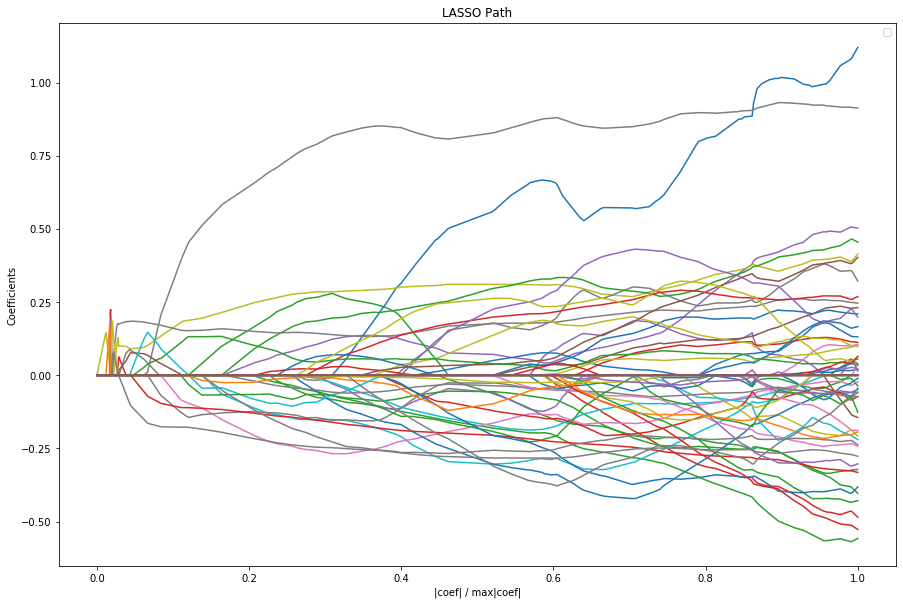

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X = df_xp.values
y = df_phen[' "grupa"'].values

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(15,10))
plt.plot(xx, coefs.T)
plt.legend()
ymin, ymax = plt.ylim()
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

## Identifying genes with the highest score

In [18]:
np.argmax(coefs[:, 100])

18087

In [19]:
np.argmax(coefs[:, 136])

4560

In [20]:
coefs[4560, 136]

1.1206166392356374

In [21]:
df_xp.columns[4560]

'"ILMN_1689123"'

In [22]:
df_xp.columns[18087]

'"ILMN_2348905"'

## Validating dataset with logistic regression

### Phenotype dataset

In [10]:
validate(df_phen.values, 
          df_phen[' "grupa"'].values, LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial', max_iter=5000), KFold(n_splits=3, shuffle=True))

/home/mateusz/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/mateusz/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/mateusz/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


{'avg_missclass': 0.7962962962962963,
 'avg_acc': 0.2037037037037037,
 'avg_prec': 0.2037037037037037,
 'avg_F1': 0.2037037037037037,
 'avg_scaled_conf_mx': array([[1., 3., 2., 1., 1.],
        [1., 4., 5., 0., 4.],
        [1., 1., 1., 4., 4.],
        [1., 1., 0., 1., 3.],
        [1., 1., 3., 6., 4.]]),
 'avg_conf_prob_mx': array([[0.01851852, 0.05555556, 0.03703704, 0.01851852, 0.01851852],
        [0.01851852, 0.07407407, 0.09259259, 0.        , 0.07407407],
        [0.01851852, 0.01851852, 0.01851852, 0.07407407, 0.07407407],
        [0.01851852, 0.01851852, 0.        , 0.01851852, 0.05555556],
        [0.01851852, 0.01851852, 0.05555556, 0.11111111, 0.07407407]])}

### Gene expression dataset

In [11]:
validate(df_xp.values, 
          df_phen[' "grupa"'].values, LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial', max_iter=1000), KFold(n_splits=3, shuffle=True))

/home/mateusz/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/mateusz/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


{'avg_missclass': 0.7962962962962963,
 'avg_acc': 0.2037037037037037,
 'avg_prec': 0.2037037037037037,
 'avg_F1': 0.2037037037037037,
 'avg_scaled_conf_mx': array([[0., 4., 2., 0., 2.],
        [4., 1., 4., 0., 5.],
        [2., 5., 2., 1., 1.],
        [2., 0., 2., 0., 2.],
        [2., 4., 0., 1., 8.]]),
 'avg_conf_prob_mx': array([[0.        , 0.07407407, 0.03703704, 0.        , 0.03703704],
        [0.07407407, 0.01851852, 0.07407407, 0.        , 0.09259259],
        [0.03703704, 0.09259259, 0.03703704, 0.01851852, 0.01851852],
        [0.03703704, 0.        , 0.03703704, 0.        , 0.03703704],
        [0.03703704, 0.07407407, 0.        , 0.01851852, 0.14814815]])}